# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file)

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table.
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Your code here.
data = {
    'StudentID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
    'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
}

student_data = pd.DataFrame(data)

Draw a dispersion diagram (scatter plot) for the data.

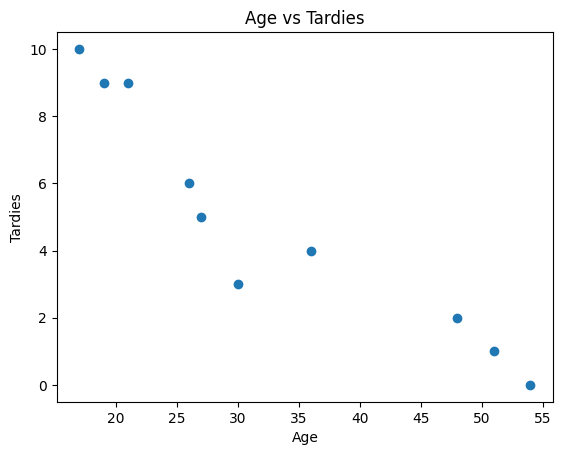

In [ ]:
Age = student_data['Age']
Tardies = student_data['Tardies']

plt.scatter(Age, Tardies)

plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Age vs Tardies')

plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here.
# Younger students are more likely to be late to class compared to older students.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [ ]:
# Your response here.
#correlation: it goes from -1 to +1 and, if positive, it meas that the variables are positively related and viceversa. If 0 --> no relationship


#covariance: it measures the degree to which 2 variables change together. If positive --> one variable increases, the other tends to increase as well.

# conclussion: as the student's age increases, the number of student arriving late tend to decrease

In [ ]:
covariance = student_data['Age'].cov(student_data['Tardies'])
correlation = student_data['Age'].corr(student_data['Tardies'])

print(covariance, correlation)


-45.56666666666666 -0.9391626886887122


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [ ]:
# Your response here.
# My outcome variable will be the number of tardies
# I will use a simple linear regression model. Why?
#there is one predictor variable (age) and one outcome variable (tardies) and I want to predict he number of tardies based on the age. This is the best model for that

Plot your regression model on your scatter plot.

In [ ]:
# predictor variable (independent variable): Age
X = sm.add_constant(student_data['Age'])

# outcome variable (dependent variable): Tardies
y = student_data['Tardies']

# LMR
model = sm.OLS(y, X).fit()

# Model - i found this in an article It really helps me to see the full overview of the model before plotting it but also to interpretate i for the next questions
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           5.57e-05
Time:                        07:22:17   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


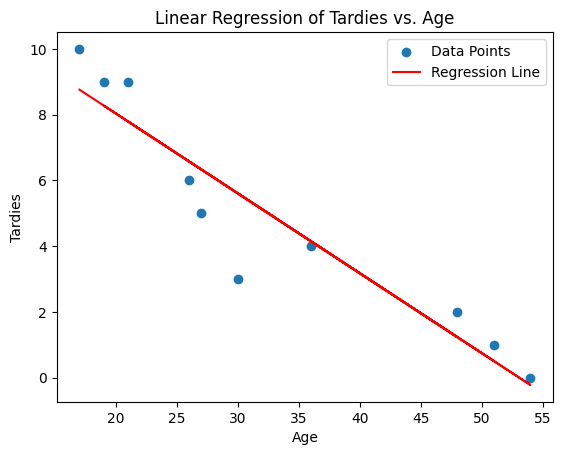

In [ ]:
# creating the scatter plot and the regression line (Bets I keep repeating the logic and these comments for learning purposes)
plt.scatter(student_data['Age'], student_data['Tardies'], label='Data Points')
plt.plot(student_data['Age'], model.predict(X), color='red', label='Regression Line')

# formatting
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Linear Regression of Tardies vs. Age')
plt.legend()

plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           5.57e-05
Time:                        07:24:52   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
# Your response here.
# R-squaare: aprox 88% of the number of tardies can be explained by age
# Coefficient of Age: -0.24 --> for each one-year increase in age, the number of tardies goes down by 0.24 --> the younger the students the more likely the are late
# p-value: very low, close to zero. it means age is a very significant predictor of being late
# overall fit is very low - good predictor

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables.

In [ ]:
# Import any libraries you may need & the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
path = '/content/vehicles.csv'
vehicles = pd.read_csv(path)

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable.

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [ ]:
# Your response here.
correlations = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']].corr()
correlations


,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


<Axes: >

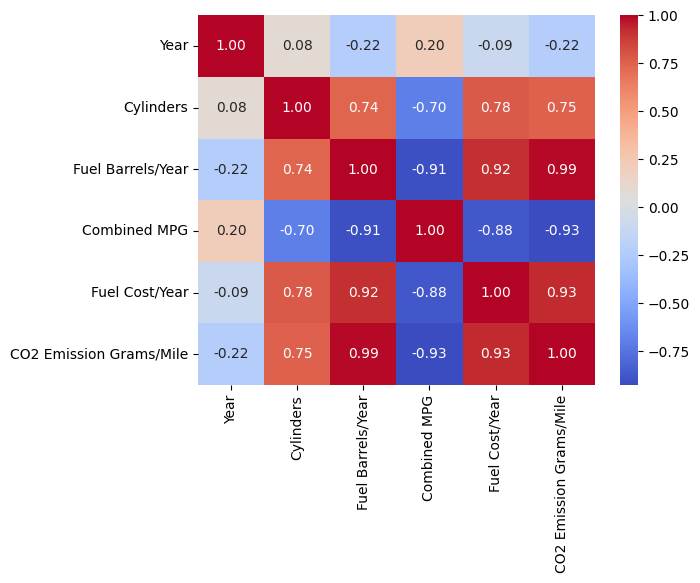

In [ ]:
# i want to see a heatmap
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")

In [ ]:
# Which variable do you think will be the most important in determining CO2 emissions?
# fuel/barrels a year has the highest positive correlation suggesting that the amount of fuel that a car consumes per year is a strong indicator of C02 emissions

# less amount of info?
# Year --> negative correlation suggesting that it is not a good indicator of Co2 emissions

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# I am using a multiple linear regression model as there are multiple predictors (not just one) contributing to the outcome
# predictor variables (independent variables)
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]

# outcome variable (dependent variable)
y = vehicles['CO2 Emission Grams/Mile']

model = sm.OLS(y, X).fit()

print(model.summary()) # i like to use this flow even thouhg is not requested. it gives me lots of info in a simple view


                                   OLS Regression Results                                   
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          6.092e+06
Date:                     Mon, 06 Nov 2023   Prob (F-statistic):                        0.00
Time:                             07:37:16   Log-Likelihood:                     -1.5250e+05
No. Observations:                    35952   AIC:                                  3.050e+05
Df Residuals:                        35947   BIC:                                  3.050e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
                        coef    std err          t      P>|t|      [0.

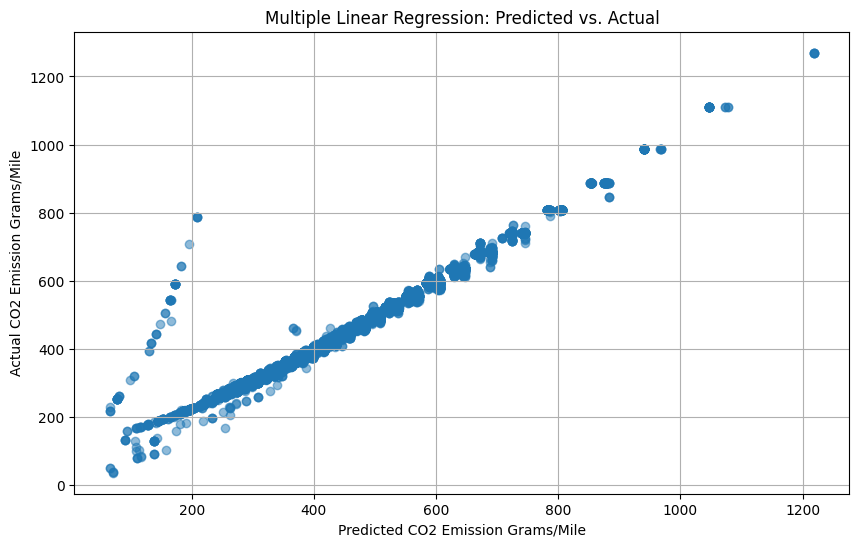

In [ ]:
predicted = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(predicted, y, alpha=0.5)
plt.xlabel("Predicted CO2 Emission Grams/Mile")
plt.ylabel("Actual CO2 Emission Grams/Mile")
plt.title("Multiple Linear Regression: Predicted vs. Actual")
plt.grid(True)
plt.show()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here.
# most important variables: those that strongly influence the Co2 emissions
# 1) fuel barrels/year has largest positive coefficient
# 2) interesting about the year: is has a positive coefficient - newer vehicles tend to have higher C02 emissions. Strange

# the model has an incredible R-squared --> explaining most of the variance of our variable C02 emissions

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression.
First, build a dataframe with the data.

In [ ]:
# Your code here.
data = {'X': [1, 3, 4, 6, 8, 9, 11, 14],
        'Y': [1, 2, 4, 4, 5, 7, 8, 13]}

df = pd.DataFrame(data)

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

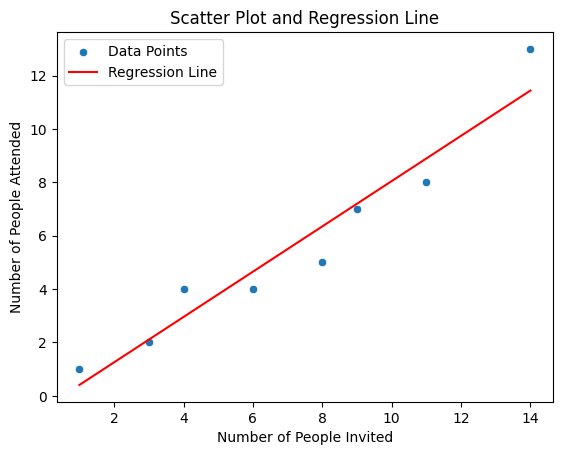

In [ ]:
# Your code here.
sns.scatterplot(data=df, x='X', y='Y', label='Data Points')

# Fitting the regression line. I know Bets this is a longer and not so beatiful way to make it but I found this way in stackoverflow and it helps me go step by step.
X = df['X']
X = sm.add_constant(X)
y = df['Y']
model = sm.OLS(y, X).fit()
predicted = model.predict(X)
plt.plot(df['X'], predicted, color='red', label='Regression Line')

# formatting
plt.xlabel('Number of People Invited')
plt.ylabel('Number of People Attended')
plt.title('Scatter Plot and Regression Line')
plt.legend()

In [ ]:
# sns.scatterplot(data=df, x='X', y='Y')

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here.
# i can see a postive relationship between the number of people invited and the number of people who attended
# and how I did before, let me print the summary

print(model.summary()) # it does support my visual findings

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           0.000102
Time:                        07:46:39   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.5

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model.

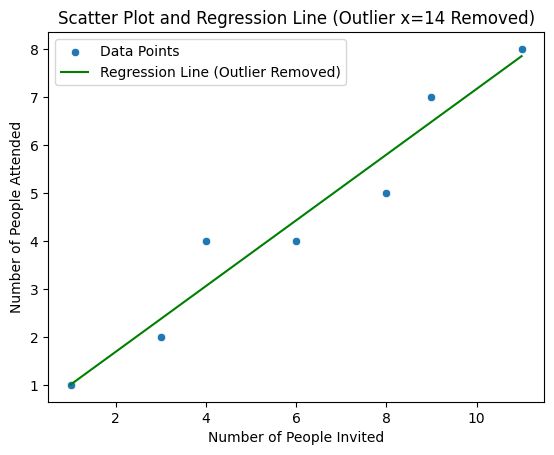

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           0.000264
Time:                        07:56:59   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3233      0.513      0.630      0.5

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [ ]:
# Your response here.
# outlier x=14
df = df[df['X'] != 14]

# new scatter plot
sns.scatterplot(data=df, x='X', y='Y', label='Data Points')

# new regression line
X = df['X']
X = sm.add_constant(X)
y = df['Y']
model = sm.OLS(y, X).fit()
predicted = model.predict(X)
plt.plot(df['X'], predicted, color='green', label='Regression Line (Outlier Removed)')

# Formatting
plt.xlabel('Number of People Invited')
plt.ylabel('Number of People Attended')
plt.title('Scatter Plot and Regression Line (Outlier x=14 Removed)')
plt.legend()
plt.show()

# Print the new regression results
print(model.summary())

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here.
# Getting rid of the odd point (x=14) made the model better.
# The new version of the model (without the odd point) has a higher R-squared value (0.943) compared to the original model (0.932),
# which means it fits the data better.